ANALYSIS:

The average cost of fares is more costly for Rural than suburban or urban rides.  This has to do with the amount of demand Pyber has in these areas. 

Urban fares attribute almost 2/3rds of the total value of fares. 

Over 80 percent of the drivers are located in urban areas.

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
df = pd.merge(city_df, ride_df, how='left', on=['city', 'city'])
# Display the data table for preview   
df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


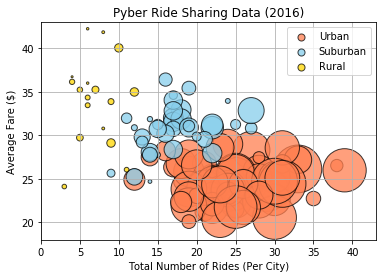

In [3]:
#type_city_df.iloc[:,] == 'Urban'
df.head()
urban = df[df['type']=='Urban']
suburban = df[df['type']=='Suburban']
rural = df[df['type']=='Rural']
#Type data
urban = urban.groupby(['type', 'city']).agg({'fare':'mean', 'ride_id':'count', 'driver_count':'sum'}).reset_index(drop=True)
suburban = suburban.groupby(['type', 'city']).agg({'fare':'mean', 'ride_id':'count', 'driver_count':'sum'}).reset_index(drop=True)
rural = rural.groupby(['type', 'city']).agg({'fare':'mean', 'ride_id':'count', 'driver_count':'sum'}).reset_index(drop=True)
#Urban x, y axis
y_axis = urban['fare']
x_axis = urban['ride_id']
s = urban['driver_count']
plt.scatter(x_axis, y_axis, marker="o", facecolors='coral', edgecolors="black",
            s=s, alpha=0.75)
#suburban x, y axis
y_axis = suburban['fare']
x_axis = suburban['ride_id']
s = suburban['driver_count']
plt.scatter(x_axis, y_axis, marker="o", facecolors='skyblue', edgecolors="black",
            s=s, alpha=0.75)
#rural x, y axis
y_axis = rural['fare']
x_axis = rural['ride_id']
s = rural['driver_count']
plt.scatter(x_axis, y_axis, marker="o", facecolors='gold', edgecolors="black",
            s=s, alpha=0.75)
plt.xlim(0,43)
plt.ylim(18,43)
plt.grid()
lgnd = plt.legend(['Urban','Suburban', 'Rural'], markerscale=0.4, scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]
plt.savefig
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.savefig('Pyber Ride Sharing Data (2016)')
plt.show()

# Total Fares by City Type

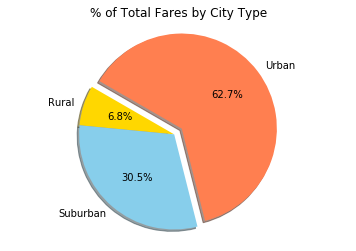

In [5]:
# Calculate Ride Percents
total_fare_percent = df.groupby('type')['fare'].sum().div(df['fare'].sum())
# Build Pie Chart
total_fare_percent.plot(kind='pie', explode=(0, 0, 0.1), colors=['gold','skyblue','coral'], shadow=True, autopct="%1.1f%%",startangle=150)
# Save Figure
plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.ylabel('')
plt.savefig('% of Total Fares by City Type')
plt.show()

# Total Rides by City Type

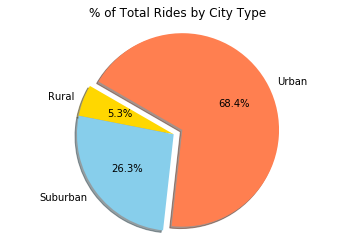

In [6]:
# Calculate Type Percents
type_percent = df.groupby('type')['ride_id'].count().div(df['ride_id'].count())
# Build Pie Chart
type_percent.plot(kind='pie', explode=(0, 0, 0.1), colors=['gold','skyblue','coral'], shadow=True, autopct="%1.1f%%",startangle=150)
# Save Figure
plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.ylabel('')
plt.savefig('% of Total Rides by City Type')
plt.show()

# Total Drivers by City Type

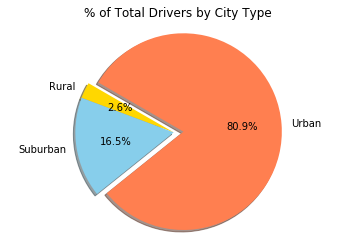

In [7]:
# Calculate Driver Percents
city_count = df.groupby(['type', 'city'])['driver_count'].mean()
total_drivers_percent = city_count.groupby('type').sum().div(df.groupby(['type', 'city'])['driver_count'].mean().sum())
# Build Pie Chart
total_drivers_percent.plot(kind='pie', explode=(0, 0, 0.1), colors=['gold','skyblue','coral'], shadow=True, autopct="%1.1f%%", startangle=150)
# Save Figure
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.ylabel('')
plt.savefig('% of Total Drivers by City Type')
plt.show()